# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 
<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [104]:
# Import the necessary libraries 
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
# We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.



**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [105]:
#In this step I loaded ab_data.csv dataset and shows the first five rows
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [106]:
# Use shape function to find the number of rows in dataset
df.shape[0]

294478

**c.** The number of unique users in the dataset.

In [107]:
# Find the number of unique users in dataset
df.user_id.nunique()

290584

**d.** The proportion of users converted.

In [108]:
# To find the proportion of users converted, I divide numbers of users converted by the total number of users.
# Numbers of users converted ---->35237
# Total number of users      ---->294478
len(df.query("converted == '1'")) / len(df.query("converted"))

0.11965919355605512

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [109]:
# I added both
# the number of times when the "group" == treatment but "landing_page" != new_page(old_page) ----->1965
# the number of times when the "group" != treatment(control) but "landing_page" == new_page  ----->1928
Treat_Notnewpage=len(df.query('group == "treatment"  and landing_page != "new_page"'))
Nottreat_Newpage=len(df.query('group != "treatment"  and landing_page == "new_page"'))
print(Treat_Notnewpage + Nottreat_Newpage)

3893


**f.** Do any of the rows have missing values?

In [110]:
# Check for missing values
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

The result is 0 ,therefore there is no missing values

### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

To solve this question I stored a copy of df in df2 then, I use [pd.concat() function](https://datacarpentry.org/python-socialsci/11-joins/index.html) to join between the control group users match with old_page and the treatment group users matched with the new_page, that means df2 dosen't contain the rows where treatment does not match with new_page or control does not match with old_page.

In [112]:
# stored a copy of df in df2
df2=df.copy()
# The control group users match with old_page
cont_Oldpage=df2.query('group == "control" and landing_page == "old_page"')
# The treatment group users matched with the new_page
treat_Newpage=df2.query('group == "treatment" and landing_page == "new_page"')
# Use concat() function 
df2=pd.concat([cont_Oldpage,treat_Newpage])

In [113]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [114]:
# Find the number of unique users in df2
df2.user_id.nunique()

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [115]:
# Find repeated user_id in df2
df2[df2.duplicated(['user_id'])]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


The result shows 773192 is a repeated user_id.

**c.** Display the rows for the duplicate **user_id**? 

In [116]:
# Use query() function to display the rows for duplicate user_id (773192)
df2.query('user_id == "773192"')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

To solve this question I use [drop() function](https://www.w3schools.com/python/pandas/ref_df_drop.asp) to drop one of the rows which is row number 2893 with a duplicate user_id.

In [117]:
# Remove one of the rows with a duplicate user_id.
df2.drop(labels=2893,inplace=True)
# Check again if the row with a duplicate user_id is deleted or not
df2.query('user_id == "773192"')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>

In [118]:
# The probability of an individual converting regardless of the page they receive
df2.converted.mean()

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [120]:
# Given that an individual was in the control group,the probability they converted
# compute conversion rate for control group
control_conversionRate=df2.query('group == "control"')['converted'].mean() 
control_conversionRate

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [121]:
# Given that an individual was in the treatment group,the probability they converted
# compute conversion rate for treatment group
treatment_conversionRate=df2.query('group == "treatment"')['converted'].mean() 
treatment_conversionRate

0.11880806551510564

In [122]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff= treatment_conversionRate - control_conversionRate 
obs_diff

-0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [130]:
# new_page ---->145310
# total page ---->290584
len(df2.query('landing_page == "new_page"')) / len(df2.landing_page) 

0.5000619442226688

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

>We got the following results from part (a) to part (d): <li>The probability of an individual converting regardless of the page they receive is 0.119 or 11.9%.</li><li>	Given that an individual was in the control group, the probability of converting is 0.120 or 12%.</li><li>	Given that an individual was in the treatment group, the probability of converting is 0.118 or 11.8%  and the actual difference between the conversion rates for the two groups is -0.0015.</li><li>	The probability of receiving the new page is 0.500 or 50%.</li>
Based on the results, the conversion rate for control group equale 12% and the conversion rate for treatment group equale 11.8%.  To sum up the results, the conversion rate is very similar and approximate between the control group and the treatment group with a very small increase in the conversion rate for control group. Therefore, I cannot determine whether the new treatment group users lead to more conversions due to insufficient evidence.

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

>$Null Hypothesis (H_0): p_{new} - p_{old}  <= 0 $<br>
$Alternative Hypothesis (H_1): p_{new} - p_{old}  > 0 $

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [131]:
# compute p_new under the null
p_new=len(df2.query("converted == '1'")) / len(df2.query("converted"))
p_new

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [132]:
# compute p_old under the null
p_old=len(df2.query("converted == '1'")) / len(df2.query("converted"))
p_old

0.11959708724499628

>Then, $p_{new}$ = $p_{old}$ = $p_{population}$= 0.11959 regardless of the page

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br>

In [133]:
# compute the number of individuals in the treatment group
n_new=len(df2.query('landing_page == "new_page"')) 
n_new

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [134]:
# compute the number of individuals in the control group
n_old=len(df2.query('landing_page == "old_page"')) 
n_old

145274

In [135]:
# compute the difference between p_new - p_old under the null
difference= p_new - p_old
difference

0.0

> The difference between p_new - p_old under the null = 0 because, $p_{new}$ = $p_{old}$ both of them are equal

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br>
Store these $n_{new}$ 1's and 0's in the `new_page_converted` numpy array.

In [86]:
# Simulate a Sample for the treatment Group
new_page_converted=np.random.choice([1,0],size=n_new,replace=True,p=[p_new,(1-p_new)])
new_page_converted.mean()

0.12013626040878123

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [136]:
# Simulate a Sample for the control Group
old_page_converted=np.random.choice([1,0],size=n_old,replace=True,p=[p_old,(1-p_old)])
old_page_converted.mean()

0.11864476781805416

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [137]:
#compute the difference in the "converted" probability  (𝑝′𝑛𝑒𝑤  -  𝑝′𝑜𝑙𝑑)
new_page_converted.mean() - old_page_converted.mean()

0.0014914925907270615


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [138]:
# Bootstrapping and sampling distribution 
p_diffs = []

for _ in range(10000):
    b_new_page_converted=np.random.choice([1,0],size=n_new,replace=True,p=[p_new,(1-p_new)])# bootstrap the sample data for new page
    b_old_page_converted=np.random.choice([1,0],size=n_old,replace=True,p=[p_old,(1-p_old)])# bootstrap the sample data for old page
    new_page_converted_mean=b_new_page_converted.mean()
    old_page_converted_mean=b_old_page_converted.mean() 
    p_diffs.append(new_page_converted_mean - old_page_converted_mean)# append the information 

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  

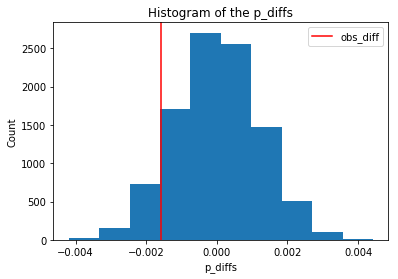

In [139]:
# Convert p_diffs to numpy array
p_diffs=np.array(p_diffs)
# Plot a histogram of the p_diffs. 
plt.hist(p_diffs);
# Mark the actual difference observed in the df2 data (obs_diff)
plt.axvline(x=obs_diff , color="red",label='obs_diff')
# Display title, x-label, and y-label in the chart.
plt.title("Histogram of the p_diffs");
plt.xlabel("p_diffs");
plt.ylabel("Count");
plt.legend();

So, as I expected plot is normal  distribtuion.

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [140]:
# Find the proportion of the p_diffs compared with the actual difference observed in the df2 data
(p_diffs > obs_diff).mean()

0.90429999999999999

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

>- The value I calculated in **j** above  called P-value in scientific studies. As we studied in lessons the P-value is the likelihood that your statistic will be seen if the null hypothesis is correct.<br>
- Our p-value equal 0.904 (90%) and our Type I error threshold (α) equal 0.05 (5%).So, when we compare both p-value and Type I error threshold the result shows p-value is greater than Type I error threshold (0.904 > 0.05) that means we failed to reject $H_0$ or in the other hand we accept the $H_0$.
- Based on the result we obtained, the old page is signify better than the new page.



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [141]:
# Import the necessary library 
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = len(df2.query('converted == "1" and landing_page == "old_page"'))
print(convert_old)

# number of conversions with the new_page
convert_new =len(df2.query('converted == "1" and landing_page == "new_page"'))
print(convert_new)

# number of individuals who were shown the old_page
n_old = len(df2.query('landing_page == "old_page"'))
print(n_old)

# number of individuals who received new_page
n_new = len(df2.query('landing_page == "new_page"'))
print(n_new)

17489
17264
145274
145310


**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 

The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. We determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. In other words, a "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.

Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org

---

In [143]:
# Find z_score and p_value
z_score, p_value = sm.stats.proportions_ztest(count=[convert_old,convert_new], nobs=[n_old,n_new], alternative='smaller')
print(z_score, p_value)

1.31092419842 0.905058312759


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>

>**Tip**: Notice whether the p-value is similar to the one computed earlier. Accordingly, can you reject/fail to reject the null hypothesis? It is important to correctly interpret the test statistic and p-value.

> - In the above question we calculated the z-score and p-value and we get the z-score is equal 1.311 and the p-value is equal 0.905.<br>
- Our value is a right-tailed test $H_1$ as $(p_{new} > p_{old})$, that means if $Z_{score}$ > $Z_{\alpha}$  we reject $H_0$.
- When we compared between $Z_{score}$(1.311) and $Z_{\alpha}$(1.645) we found that $Z_{score}$ is less than $Z_{\alpha}$, that means we failed to reject $H_0$ or in the other hand we accept the $H_0$.
- In this question p-value is 0.905 (90%) and we failed to reject $H_0$ as we findings in parts **j.** and **k.**. So, In the end we got the same result the old page is signify better than the new page.  

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

>We should be performing logistic regression model in this case because we have only two values conversion (1) or no conversion (0). 

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [144]:
# Intercept 
df2['intercept']=1
# Dummy variable 
df2['ab_page']=pd.get_dummies(df2['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [145]:
# Create and fit logistic regression model
logit_model=sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results=logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [146]:
# Display the summary of logistic regression model
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-12-04 18:19 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

**Hints**: 
- What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**? 
- You may comment on if these hypothesis (Part II vs. Part III) are one-sided or two-sided. 
- You may also compare the current p-value with the Type I error rate (0.05).


>- In **Part II** the null and alternative hypotheses are one tailed test (one-sided) as following: <br>
$Null Hypothesis (H_0): p_{new} - p_{old}  <= 0 $<br>
$Alternative Hypothesis (H_1): p_{new} - p_{old}  > 0 $
- In **Part III** the null and alternative hypotheses are two tailed test (two-sided) as following: <br>
$Null Hypothesis (H_0): p_{new} - p_{old}  = 0 $<br>
$Alternative Hypothesis (H_1): p_{new} - p_{old}  != 0 $
- In **Part II** p-value is 0.9 ,when we compare both p-value and Type I error rate (0.05) the result shows p-value is greater than Type I error threshold (0.9 > 0.05) that means we failed to reject $H_0$.
- In **Part III** p-value is 0.1899,when we compare both p-value and Type I error rate (0.05) the result shows p-value is greater than Type I error threshold (0.1899 > 0.05) that means we failed to reject $H_0$ and that means ab_page variable isn't statistically significant variable for predicting conversion based on the page-type a customer receives. 
- As a result, both **Part II** and **Part III** show the same result which is the old page is signify better than the new page (failed to reject $H_0$) but with diffrent p-values,the reason for the difference in p-values maybe the type of test, whether it is one tailed test  or two tailed test. 



**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

> - In my opinion,if we add in our logistic regression model the timestamp factor it is determine whether or not an individual converts that means the timestamp factor is statistically significant variable. <br>
- The disadvantages to adding more terms into logistic regression model are:<br>
     - Multicollinearity: when predictor variables are associated with one another, we get multicollinearity.
     - Increased difficulty in implementing the logistic regression model.

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 
>**Hint:** Use `pandas.get_dummies()` to create dummy variables. **You will utilize two columns for the three dummy variables.** 

 Provide the statistical output as well as a written response to answer this question.

In [147]:
# Read the countries.csv and shows the first five rows
countries_df=pd.read_csv('countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [148]:
# Join with the df2 dataframe and using user_id as the key columns
df_merged=countries_df.set_index('user_id').join(df2.set_index('user_id'),how='inner')
df_merged.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [149]:
# Create the necessary dummy variables
df_merged[['UK', 'US', 'CA']]= pd.get_dummies(df_merged['country'])
# drop UK to utilize two columns for the three dummy variables
df_merged=df_merged.drop('US', axis=1)
df_merged.head()                  

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,CA
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0


**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 

In [151]:
# Create the necessary additional columns to show the effect of page and country to predict the conversion
df_merged['ab_page_UK']= df_merged["ab_page"] * df_merged["UK"]
df_merged['ab_page_CA']= df_merged["ab_page"] * df_merged["CA"]
# Create and fit the new logistic regression model
logit_model2=sm.Logit(df_merged['converted'],df_merged[['intercept','ab_page','UK','CA','ab_page_UK','ab_page_CA']])
results2=logit_model2.fit()
# Display the summary of the new logistic regression model
results2.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-12-04 18:24 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9922    0.0161  -123.4571  0.0000  -2.0238  -1.9606
ab_page       0.0108    0.0228     0.4749  0.6349  -0.0339   0.0555
UK           -0.0118    0.0398    -0.2957  0.7674  -0.0899   0.0663
CA            0.0057    0.0188     0.3057  0.7598  -0.0311   0.0426
ab_page_UK   -0.0783    0.0568    -1.3783  0.1681  -0.1896   0.0330
ab_page_CA   -0.0314    0.0266    -1.1807  0.2377  -0.0835   0.0207
==================================================================

"""

> - As shown above all of p-values in the summary are :  UK is 0.7674, CA is  0.7598, ab_page_UK is 0.1681 and ab_page_CA is 0.2377.
- When we compared p-values for UK and CA countries and Type I error rate (0.7674 > 0.05) and (0.7598 > 0.05) the results are the p-valuse is greater than the Type I error rate that means we failed to reject the null hypotheses. Thus,the country had no effect to predict the conversion.
- When we compared p-values for ab_page_UK and ab_page_CA and Type I error rate ( 0.1681 > 0.05) and ( 0.2377 > 0.05) the results are the p-valuse is greater than the Type I error rate that means we faile to reject the null hypotheses. Thus, the page and country have no effect to predict the conversion.

### Conclusions
Finally, based on the results we obtained via A/B Test in **Part II** and logistic regression model in **Part III** all p-values we computed is greater than the Type I error rate that means we failed to reject the null hypotheses. Thus,We did not reach scientific facts that show that the new page is better than the old page, but it shows the opposite that the old page is better than the new one, so we advise the company to stay with the old page.

<a id='finalcheck'></a>
## Final Check!

Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

<a id='submission'></a>
## Submission
You may either submit your notebook through the "SUBMIT PROJECT" button at the bottom of this workspace, or you may work from your local machine and submit on  the last page of this project lesson.  

1. Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).


2. Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.


3. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [152]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0